# Subject: Joining Data

## Jose Servin

### Data used: https://www.chicago.gov/city/en/depts/other/dataset/wards.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Importing data and DF definition

In [2]:
wards = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/Ward_Offices.csv')
wards = wards[['WARD', 'ALDERMAN', 'ADDRESS','ZIPCODE']].copy()
wards.columns = [x.lower() for x in wards.columns]
wards.head()


,ward,alderman,address,zipcode
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,60618
1,17,"Moore, David H.",1344 West 79th Street,60636
2,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",60657
3,37,"Mitts, Emma",5344 West North Avenue,60651
4,4,"King, Sophia D.",435 East 35th Street,60616


In [3]:
wards.dtypes

ward         int64
alderman    object
address     object
zipcode      int64
dtype: object

In [4]:
census = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/ward_population.csv')
census.head()

,ward,pop_2010,pop_2016,pct_change,address,zip_code
0,1,"56,149","56,661",1%,1958 North Milwaukee Avenue,60647
1,2,"55,805","57,705",3%,1400 North Ashland Avenue,60622
2,3,"53,039","55,763",5%,5046 South State Street,60609
3,4,"54,589","57,301",5%,435 East 35th Street,60616
4,5,"51,455","52,073",1%,2325 East 71st Street,60649


In [5]:
census.dtypes

ward           int64
pop_2010      object
pop_2016      object
pct_change    object
address       object
zip_code       int64
dtype: object

In [6]:
census['ward'] = census['ward'].astype(int)


In [7]:
census.dtypes

ward           int64
pop_2010      object
pop_2016      object
pct_change    object
address       object
zip_code       int64
dtype: object

In [8]:
census['pop_2010'] = census['pop_2010'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [9]:
census.dtypes

ward           int64
pop_2010       int64
pop_2016      object
pct_change    object
address       object
zip_code       int64
dtype: object

In [10]:
census['pop_2016'] = census['pop_2016'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [11]:
census.dtypes

ward           int64
pop_2010       int64
pop_2016       int64
pct_change    object
address       object
zip_code       int64
dtype: object

In [12]:
census['pct_change'] = census['pct_change'].str.rstrip('%').astype('float') / 100.0


In [13]:
census.dtypes

ward            int64
pop_2010        int64
pop_2016        int64
pct_change    float64
address        object
zip_code        int64
dtype: object

In [14]:
census.head()

,ward,pop_2010,pop_2016,pct_change,address,zip_code
0,1,56149,56661,0.01,1958 North Milwaukee Avenue,60647
1,2,55805,57705,0.03,1400 North Ashland Avenue,60622
2,3,53039,55763,0.05,5046 South State Street,60609
3,4,54589,57301,0.05,435 East 35th Street,60616
4,5,51455,52073,0.01,2325 East 71st Street,60649


In [15]:
wards.dtypes

ward         int64
alderman    object
address     object
zipcode      int64
dtype: object

In [16]:
wards.head()

,ward,alderman,address,zipcode
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,60618
1,17,"Moore, David H.",1344 West 79th Street,60636
2,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",60657
3,37,"Mitts, Emma",5344 West North Avenue,60651
4,4,"King, Sophia D.",435 East 35th Street,60616


# Inner Join

## only returns matching values in both tables

In [17]:
wards_census  = wards.merge(census, on='ward', suffixes=('_ward','_cens'))
wards_census.head()

,ward,alderman,address_ward,zipcode,pop_2010,pop_2016,pct_change,address_cens,zip_code
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,60618,55598,56121,0.01,3001 West Irving Park Road,60618
1,17,"Moore, David H.",1344 West 79th Street,60636,51846,49271,-0.05,1344 West 79th Street,60636
2,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",60657,56058,59871,0.07,"3223 North Sheffield Avenue, Suite A",60657
3,37,"Mitts, Emma",5344 West North Avenue,60651,51538,51178,-0.01,5344 West North Avenue,60651
4,4,"King, Sophia D.",435 East 35th Street,60616,54589,57301,0.05,435 East 35th Street,60616


In [18]:
wards_census.shape

(50, 9)

In [19]:
# value_counts() of zipcodes in wards_census DF
wards_census['zipcode'].value_counts()

60618    3
60609    3
60628    2
60639    2
60636    2
60608    2
60622    2
60612    2
60630    2
60659    2
60614    2
60640    2
60617    2
60619    2
60643    1
60626    1
60647    1
60629    1
60621    1
60649    1
60634    1
60631    1
60632    1
60623    1
60652    1
60607    1
60602    1
60624    1
60620    1
60641    1
60616    1
60651    1
60657    1
60638    1
Name: zipcode, dtype: int64

## One-to-Many Relationships

In [20]:
# Import Buiness_Licenses csv containing active businesses in each ward
wards_businesses = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/Business_Licenses.csv')
wards_businesses.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS', 'LICENSE STATUS CHANGE DATE', 'SSA',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [21]:
wards_businesses = wards_businesses[['ACCOUNT NUMBER','WARD','LICENSE NUMBER','LEGAL NAME','ADDRESS','ZIP CODE']]

In [22]:
wards_businesses.columns = [x.lower() for x in wards_businesses.columns]
wards_businesses.head()

,account number,ward,license number,legal name,address,zip code
0,406944,42.0,2818099,"GERMAN AMERICAN EVENTS, LLC",150 N MICHIGAN AVE 35TH,60601
1,337918,42.0,2818166,THE NOBLE GRAPE CORPORATION,50 W WASHINGTON ST,60602
2,385905,44.0,2822280,Patrick Markham,3252 N BROADWAY,60657
3,385905,47.0,2822276,Patrick Markham,4560 N LINCOLN AVE,60625
4,385905,1.0,2822277,Patrick Markham,2439 W FULLERTON AVE,60647


In [23]:
wards_businesses.isna().sum()

account number     0
ward              32
license number     0
legal name         0
address            0
zip code           0
dtype: int64

In [24]:
wards_businesses = wards_businesses[wards_businesses['ward'].notna()]

In [25]:
wards_businesses.isna().sum()

account number    0
ward              0
license number    0
legal name        0
address           0
zip code          0
dtype: int64

In [26]:
wards_businesses = wards_businesses[wards_businesses['license number'].notna()]

In [27]:
wards_businesses.isna().sum()

account number    0
ward              0
license number    0
legal name        0
address           0
zip code          0
dtype: int64

In [28]:
wards_businesses = wards_businesses[wards_businesses['zip code'].notna()]

In [29]:
wards_businesses.isna().sum()

account number    0
ward              0
license number    0
legal name        0
address           0
zip code          0
dtype: int64

In [30]:
wards_businesses['ward'] = wards_businesses['ward'].astype(int)

In [31]:
wards_businesses['zip code'] = wards_businesses['zip code'].astype(int)

In [32]:
wards_businesses.dtypes

account number     int64
ward               int64
license number     int64
legal name        object
address           object
zip code           int64
dtype: object

In [33]:
wards_businesses.shape

(267, 6)

In [34]:
wards_businesses_merge = wards.merge(wards_businesses, on='ward', suffixes=('_wards','_buissiness'))

In [35]:
wards_businesses_merge.sort_values('ward')

,ward,alderman,address_wards,zipcode,account number,license number,legal name,address_buissiness,zip code
150,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,385905,2822277,Patrick Markham,2439 W FULLERTON AVE,60647
151,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,477200,2802928,CHICAGO MAKERS POP UP LLC,1821 W CHICAGO AVE,60622
152,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,203814,2812570,"CHIPP INN, INC.",832 N GREENVIEW AVE SIDEWALK,60642
153,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,15848,2812560,"FIGUEROA BAR, INC.",1958 W HURON ST,60622
154,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,377484,2797224,YUM DUM INC.,1420 N WOOD ST,60622
...,...,...,...,...,...,...,...,...,...
19,48,"Osterman, Harry",5533 North Broadway,60640,3649,2802977,BROADWAY JOE'S INC,6036 N BROADWAY,60660
165,49,"Hadden, Maria E.",1447 West Morse Avenue,60626,299612,2803847,"LAPDOG, INC.",1508 W JARVIS AVE,60626
164,49,"Hadden, Maria E.",1447 West Morse Avenue,60626,36746,2803812,"STINDLE, INC.",1500-1524 W JARVIS AVE,60626
166,49,"Hadden, Maria E.",1447 West Morse Avenue,60626,313311,2803844,"FLANGELATO, LLC",1500-1524 W JARVIS AVE,60626


In [36]:
wards_businesses.to_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/ward_businesses.csv', index=False)

## Mergin Multiple DataFrames

In [37]:
# Introduce business_grants DataFrame
business_grants = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/business_grants.csv')
business_grants.columns

Index(['address', 'zip code', 'INCENTIVE AMOUNT', 'grant', 'company'], dtype='object')

In [38]:
business_grants = business_grants[['address','zip code','grant','company']]

In [39]:
wards_businesses.columns

Index(['account number', 'ward', 'license number', 'legal name', 'address',
       'zip code'],
      dtype='object')

In [40]:
wards.columns

Index(['ward', 'alderman', 'address', 'zipcode'], dtype='object')

In [41]:
business_grants.merge(wards_businesses, on=['address','zip code'])

,address,zip code,grant,company,account number,ward,license number,legal name
0,150 N MICHIGAN AVE 35TH,60601,150000.00,"GERMAN AMERICAN EVENTS, LLC",406944,42,2818099,"GERMAN AMERICAN EVENTS, LLC"
1,150 N MICHIGAN AVE 35TH,60601,150000.00,"GERMAN AMERICAN EVENTS, LLC",406944,42,2818216,"GERMAN AMERICAN EVENTS, LLC"
2,150 N MICHIGAN AVE 35TH,60601,117072.04,"GERMAN AMERICAN EVENTS, LLC",406944,42,2818099,"GERMAN AMERICAN EVENTS, LLC"
3,150 N MICHIGAN AVE 35TH,60601,117072.04,"GERMAN AMERICAN EVENTS, LLC",406944,42,2818216,"GERMAN AMERICAN EVENTS, LLC"
4,50 W WASHINGTON ST,60602,150000.00,THE NOBLE GRAPE CORPORATION,337918,42,2818166,THE NOBLE GRAPE CORPORATION
...,...,...,...,...,...,...,...,...
276,6150 S NEENAH AVE 1 1,60638,19500.00,STANISLAW ZALINSKI,306119,13,2207151,STANISLAW ZALINSKI
277,4912 S CICERO AVE 1ST,60638,50000.00,ALI M AGEL & GERMAN ARGUETA,26906,22,2213934,ALI M AGEL & GERMAN ARGUETA
278,7634 S BISHOP ST,60620,50000.00,Southside Clothing LLC,463965,17,2698815,Southside Clothing LLC
279,9150 S PAXTON AVE,60617,100000.00,JAMES R. KING,403109,7,2442462,JAMES R. KING


In [42]:
grants_licenses_ward = business_grants.merge(wards_businesses, on=['address','zip code']) \
    .merge(wards, on='ward', suffixes = ('_bus','_ward'))

In [43]:
grants_licenses_ward.shape

(281, 11)

In [44]:
grants_licenses_ward.dtypes

address_bus        object
zip code            int64
grant             float64
company            object
account number      int64
ward                int64
license number      int64
legal name         object
alderman           object
address_ward       object
zipcode             int64
dtype: object

## Final Data Cleaning needed for plot

In [45]:
grants_licenses_ward['zip code'] = grants_licenses_ward['zip code'].astype(object)

In [46]:
grants_licenses_ward['account number'] = grants_licenses_ward['account number'].astype(object)

In [47]:
grants_licenses_ward['zipcode'] = grants_licenses_ward['zipcode'].astype(object)

In [48]:
grants_licenses_ward['license number'] = grants_licenses_ward['license number'].astype(object)

<AxesSubplot:xlabel='ward'>

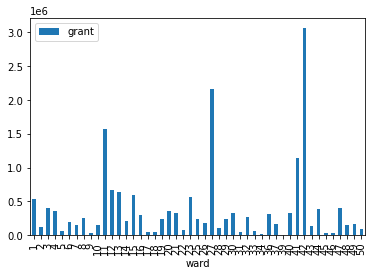

In [49]:
grants_licenses_ward.groupby('ward').agg('sum').plot(kind='bar')

#### 
df1.merge(df2, on'col') \ 
    .merge(df3, on'col')

# Left Join

## Introducing Customer and Order Table

In [50]:
orders_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/order_table.csv')
orders_data.shape

(9800, 10)

In [51]:
customers_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/customer_table.csv')
customers_data.shape

(9800, 9)

### Deleting the bottom 800 rows from the customers_data to aid continue data exploration

In [52]:
customers_data.drop(customers_data.tail(800).index, inplace=True) # drops the last 800 rows in DataFrame

In [53]:
customers_data.shape

(9000, 9)

### Left merge orders data and customers_data 

In [54]:
orders_per_customer = orders_data.merge(customers_data, on='Row ID', how='left')
orders_per_customer.shape

(9800, 18)

In [55]:
orders_per_customer.tail(100)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
9700,9701,CA-2018-154116,15/12/2018,19/12/2018,Standard Class,TEC-PH-10000675,Technology,Phones,Panasonic KX TS3282B Corded phone,196.776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9701,9702,CA-2017-105291,30/10/2017,4/11/17,Standard Class,OFF-FA-10003059,Office Supplies,Fasteners,Assorted Color Push Pins,3.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9702,9703,CA-2018-147032,31/07/2018,4/8/18,Standard Class,OFF-PA-10003256,Office Supplies,Paper,Avery Personal Creations Heavyweight Cards,11.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9703,9704,CA-2018-147032,31/07/2018,4/8/18,Standard Class,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,849.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9704,9705,CA-2018-147032,31/07/2018,4/8/18,Standard Class,OFF-BI-10002897,Office Supplies,Binders,"Black Avery Memo-Size 3-Ring Binder, 5 1/2"" x ...",11.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9796,9797,CA-2016-128608,12/1/16,17/01/2016,Standard Class,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9797,9798,CA-2016-128608,12/1/16,17/01/2016,Standard Class,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9798,9799,CA-2016-128608,12/1/16,17/01/2016,Standard Class,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Left merge customers_data and orders_data

In [56]:
customers_per_order = customers_data.merge(orders_data, on='Row ID', how='left')
customers_per_order.shape

(9000, 18)

In [57]:
customers_per_order.tail(10)

,Row ID,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales
8990,8991,HM-14860,Harry Marie,Corporate,United States,Springfield,Missouri,65807.0,Central,US-2016-128587,24/12/2016,30/12/2016,Standard Class,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,4899.930
8991,8992,TN-21040,Tanja Norvell,Home Office,United States,San Francisco,California,94110.0,West,US-2018-139577,1/10/18,6/10/18,Standard Class,TEC-AC-10004708,Technology,Accessories,Sony 32GB Class 10 Micro SDHC R40 Memory Card,104.750
8992,8993,VP-21760,Victoria Pisteka,Corporate,United States,Columbia,Tennessee,38401.0,South,CA-2018-159100,16/10/2018,21/10/2018,Standard Class,TEC-AC-10003499,Technology,Accessories,Memorex Mini Travel Drive 8 GB USB 2.0 Flash D...,18.528
8993,8994,VP-21760,Victoria Pisteka,Corporate,United States,Columbia,Tennessee,38401.0,South,CA-2018-159100,16/10/2018,21/10/2018,Standard Class,FUR-TA-10001950,Furniture,Tables,Balt Solid Wood Round Tables,1875.258
8994,8995,CS-12355,Christine Sundaresam,Consumer,United States,Hollywood,Florida,33021.0,South,CA-2015-109043,15/08/2015,17/08/2015,First Class,OFF-PA-10000312,Office Supplies,Paper,Xerox 1955,91.360
8995,8996,CS-12355,Christine Sundaresam,Consumer,United States,Hollywood,Florida,33021.0,South,CA-2015-109043,15/08/2015,17/08/2015,First Class,OFF-AP-10004708,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,152.240
8996,8997,PG-18820,Patrick Gardner,Consumer,United States,Dallas,Texas,75081.0,Central,US-2018-116491,11/11/18,13/11/2018,First Class,TEC-PH-10004531,Technology,Phones,OtterBox Commuter Series Case - iPhone 5 & 5s,35.184
8997,8998,HG-14845,Harry Greene,Consumer,United States,Houston,Texas,77041.0,Central,CA-2018-122763,20/03/2018,20/03/2018,Same Day,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,56.704
8998,8999,HG-14845,Harry Greene,Consumer,United States,Houston,Texas,77041.0,Central,CA-2018-122763,20/03/2018,20/03/2018,Same Day,OFF-PA-10002377,Office Supplies,Paper,Xerox 1916,274.064
8999,9000,MH-18115,Mick Hernandez,Home Office,United States,Philadelphia,Pennsylvania,19140.0,East,CA-2018-137785,13/05/2018,17/05/2018,Standard Class,FUR-CH-10001482,Furniture,Chairs,Office Star - Mesh Screen back chair with Viny...,458.430


In [58]:
customers_per_order.isna().sum()

Row ID           0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      3
Region           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

# Other Joins

## Right Join

In [59]:
customers_per_order = customers_data.merge(orders_data, on='Row ID', how='right')
customers_per_order.shape

(9800, 18)

In [60]:
customers_per_order.tail(100)

,Row ID,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales
9700,9701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2018-154116,15/12/2018,19/12/2018,Standard Class,TEC-PH-10000675,Technology,Phones,Panasonic KX TS3282B Corded phone,196.776
9701,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2017-105291,30/10/2017,4/11/17,Standard Class,OFF-FA-10003059,Office Supplies,Fasteners,Assorted Color Push Pins,3.620
9702,9703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2018-147032,31/07/2018,4/8/18,Standard Class,OFF-PA-10003256,Office Supplies,Paper,Avery Personal Creations Heavyweight Cards,11.540
9703,9704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2018-147032,31/07/2018,4/8/18,Standard Class,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,849.950
9704,9705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2018-147032,31/07/2018,4/8/18,Standard Class,OFF-BI-10002897,Office Supplies,Binders,"Black Avery Memo-Size 3-Ring Binder, 5 1/2"" x ...",11.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2016-128608,12/1/16,17/01/2016,Standard Class,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2016-128608,12/1/16,17/01/2016,Standard Class,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2016-128608,12/1/16,17/01/2016,Standard Class,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376


In [61]:
customers_per_order.isna().sum()

Row ID             0
Customer ID      800
Customer Name    800
Segment          800
Country          800
City             800
State            800
Postal Code      803
Region           800
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
dtype: int64

### Joins with different column names

In [62]:
# Rename customers_data Row ID column to ID
customers_data.columns

Index(['Row ID', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region'],
      dtype='object')

In [63]:
customers_data.rename({'Row ID': 'ID'}, axis=1, inplace=True)
customers_data.columns


Index(['ID', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region'],
      dtype='object')

In [64]:
customers_per_order = customers_data.merge(orders_data, how='right', left_on='ID', right_on='Row ID')
customers_per_order.tail()

,ID,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales
9795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9797,CA-2016-128608,12/1/16,17/01/2016,Standard Class,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9798,CA-2016-128608,12/1/16,17/01/2016,Standard Class,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9799,CA-2016-128608,12/1/16,17/01/2016,Standard Class,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9800,CA-2016-128608,12/1/16,17/01/2016,Standard Class,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


## Outer Join

In [65]:
customers_data.shape

(9000, 9)

In [66]:
orders_data.shape

(9800, 10)

In [67]:
tech_orders = orders_data[orders_data['Category'] == 'Technology']

In [68]:
tech_orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales
7,8,CA-2015-115812,9/6/15,14/06/2015,Standard Class,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152
11,12,CA-2015-115812,9/6/15,14/06/2015,Standard Class,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424
19,20,CA-2015-143336,27/08/2015,1/9/15,Second Class,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480
26,27,CA-2017-121755,16/01/2017,20/01/2017,Second Class,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570
35,36,CA-2017-117590,8/12/17,10/12/17,First Class,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544


In [69]:
tech_orders.shape

(1813, 10)

In [70]:
tech_and_customers = tech_orders.merge(customers_data, how='outer', left_on='Row ID', right_on='ID')

In [71]:
tech_and_customers.shape

(9143, 19)

In [72]:
tech_and_customers.isna().sum()

Row ID           7330
Order ID         7330
Order Date       7330
Ship Date        7330
Ship Mode        7330
Product ID       7330
Category         7330
Sub-Category     7330
Product Name     7330
Sales            7330
ID                143
Customer ID       143
Customer Name     143
Segment           143
Country           143
City              143
State             143
Postal Code       146
Region            143
dtype: int64

In [73]:
tech_and_customers.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales,ID,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
9138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8995.0,CS-12355,Christine Sundaresam,Consumer,United States,Hollywood,Florida,33021.0,South
9139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8996.0,CS-12355,Christine Sundaresam,Consumer,United States,Hollywood,Florida,33021.0,South
9140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8998.0,HG-14845,Harry Greene,Consumer,United States,Houston,Texas,77041.0,Central
9141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8999.0,HG-14845,Harry Greene,Consumer,United States,Houston,Texas,77041.0,Central
9142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.0,MH-18115,Mick Hernandez,Home Office,United States,Philadelphia,Pennsylvania,19140.0,East


In [74]:
category_count = orders_data.groupby('Category').agg({'Row ID':'count'})

<AxesSubplot:xlabel='Category'>

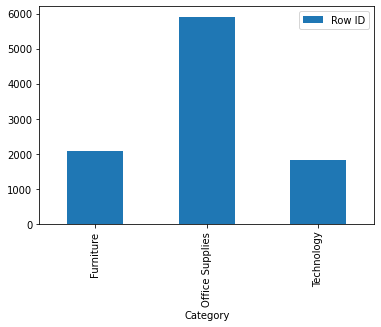

In [75]:
category_count.plot(kind='bar')

### Find which customers did not order tech products

In [76]:
tech_and_customers.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales,ID,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
0,8.0,CA-2015-115812,9/6/15,14/06/2015,Standard Class,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,8.0,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West
1,12.0,CA-2015-115812,9/6/15,14/06/2015,Standard Class,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,12.0,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West
2,20.0,CA-2015-143336,27/08/2015,1/9/15,Second Class,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,20.0,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West
3,27.0,CA-2017-121755,16/01/2017,20/01/2017,Second Class,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,27.0,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049.0,West
4,36.0,CA-2017-117590,8/12/17,10/12/17,First Class,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,36.0,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central


In [77]:
filter_index = tech_and_customers['Category'].isna()

In [78]:
non_tech_orders = tech_and_customers[filter_index]
non_tech_orders

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales,ID,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
1813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South
1814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South
1815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West
1816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South
1817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8995.0,CS-12355,Christine Sundaresam,Consumer,United States,Hollywood,Florida,33021.0,South
9139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8996.0,CS-12355,Christine Sundaresam,Consumer,United States,Hollywood,Florida,33021.0,South
9140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8998.0,HG-14845,Harry Greene,Consumer,United States,Houston,Texas,77041.0,Central
9141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8999.0,HG-14845,Harry Greene,Consumer,United States,Houston,Texas,77041.0,Central


In [79]:
orders_data[orders_data['Row ID'] == 1.0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/17,11/11/17,Second Class,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


# Merging a table to itself

In [80]:
movies_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/movies_data.csv')
movies_data

,id,title,sequel
0,1,Avatar,NaN
1,2,Toy Story,3.0
2,3,Toy Story 2,4.0
3,4,Toy Story 3,NaN
4,5,Titanic,NaN
5,6,Harry Potter 1,7.0
6,7,Harry Potter 2,8.0
7,8,Harry Potter 3,NaN


In [81]:
movies_data['sequel'] = movies_data['sequel'].fillna(0).astype(int)

In [82]:
movie_sequels = movies_data.merge(movies_data, left_on='sequel', right_on='id', suffixes=('_original','_sequel'))

In [83]:
movie_sequels.columns

Index(['id_original', 'title_original', 'sequel_original', 'id_sequel',
       'title_sequel', 'sequel_sequel'],
      dtype='object')

In [84]:
movie_sequels[['title_original','title_sequel']]

,title_original,title_sequel
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter 1,Harry Potter 2
3,Harry Potter 2,Harry Potter 3


In [85]:
movie_sequels = movies_data.merge(movies_data, left_on='sequel', right_on='id', how='left',suffixes=('_original','_sequel'))

In [86]:
movie_sequels

,id_original,title_original,sequel_original,id_sequel,title_sequel,sequel_sequel
0,1,Avatar,0,NaN,NaN,NaN
1,2,Toy Story,3,3.0,Toy Story 2,4.0
2,3,Toy Story 2,4,4.0,Toy Story 3,0.0
3,4,Toy Story 3,0,NaN,NaN,NaN
4,5,Titanic,0,NaN,NaN,NaN
5,6,Harry Potter 1,7,7.0,Harry Potter 2,8.0
6,7,Harry Potter 2,8,8.0,Harry Potter 3,0.0
7,8,Harry Potter 3,0,NaN,NaN,NaN
